# Txy and Pxy Diagrams for 2-propanol/water



## Plotting the Pxy Diagram


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import thermo as th

The calculations in this notebook are for a representative system of two components, acetone and ethanol. We start by creating two functions to estimate vapor pressure for the individual species using Antoine's equation.

In [2]:
# Antoine's equations
A = '2-propanol'
B = 'water'
R=1.987
T=353.15
a_12=437.98
a_21=1238
V_1=76.92
V_2=18.07
Pression=101325
def PsatA1(T):
    T=np.float(T)
    A = '2-propanol'
    Pression=101325
    X=th.Chemical(A)
    X.calculate(T=T,P=Pression)
    print(X.VaporPressure.T_dependent_property(T))
    p=(X.VaporPressure.T_dependent_property(T))*0.001
    return p
def PsatB1(T):
    T=np.float(T)
    B = 'water'
    Pression=101325
    X=th.Chemical(B)
    X.calculate(T=T,P=Pression)
    print(X.VaporPressure.T_dependent_property(T))
    p=(X.VaporPressure.T_dependent_property(T))*0.001
    return p
def PsatA(T):
    v= np.exp(16.678 - 3640.2/(T -53.54))
    print(v)
    return v
def PsatB(T):
    return np.exp(16.2887 - 3816.44/(T -46.13))
global Psat_1
global Psat_2
Psat_1=PsatA1(T)
Psat_2=PsatB1(T)
#print ("Psat, 2propanol=",Psat_1,'kPa',type(Psat_1))
#print ("Psat, eau=",Psat_2,'kPa')
#Psat_1=PsatA1(T)
#Psat_2=PsatB1(T)
#print ("Psat, 2propanol=",Psat_1,'kPa',type(Psat_1))
#print ("Psat, eau=",Psat_2,'kPa')

92755.86124190179
47344.13047563747


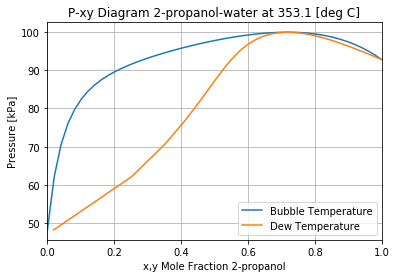

In [3]:

x_1 = np.linspace(0.001,0.999)

def gamma_1(x1):  
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*T))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*T))
    x2=1-x1
    t1=-1*np.log(x1+lamb12*x2)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1+x2*(t2-t3)
    return np.exp(ans)

def gamma_2(x2):
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*T))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*T))
    x1=1-x2
    t1=-1*np.log(x2+lamb21*x1)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1-x1*(t2-t3)
    return np.exp(ans)

def P(x1):
    x2=1-x1
    return x1*gamma_1(x1)*Psat_1+x2*gamma_2(x2)*Psat_2

def y(x1):
    return (x1*Psat_1*gamma_1(x1))/P(x1)


plt.plot(x_1, P(x_1),y(x_1),P(x_1))
plt.title('P-xy Diagram {:s}-{:s} at {:.1f} [deg C]'.format(A,B,T))
plt.legend(['Bubble Temperature','Dew Temperature'],loc='best')
plt.ylabel('Pressure [kPa]')
plt.xlabel('x,y Mole Fraction {:s}'.format(A))
plt.xlim(0,1)
plt.grid();

## Plotting the Txy Diagram

In [4]:
from scipy.optimize import brentq

def Tboil(Psat,P):
    return brentq(lambda T: Psat(T) - P,200,400)
P = 101.33
print ("Normal boiling  point of {:s} is {:.4f} deg C".format(A,Tboil(PsatA1,P)))
print ("Normal boiling point of {:s} is {:.4f} deg C".format(B,Tboil(PsatB1,P)))

0.432307922776932
466031.4156677953
80.93987439296569
21979.59662885001
125630.45798737576
87271.78673997114
100023.0558986591
101340.4825368301
101329.94437125043
101329.9999976512
101330.00000000004
101329.9999999955
Normal boiling  point of 2-propanol is 355.3845 deg C
0.09934382362141778
236732.66909749788
1038.7131466418916
27018.161764006556
88447.49376595127
105483.29359826382
101099.49987977419
101326.19265452329
101330.00008770426
101329.99999999868
101330.0000000031
Normal boiling point of water is 375.0577 deg C


In [5]:
global x_1
global x_2
x_1 = np.linspace(0.001,0.999)
x_2 = 1-x_1

def gamma_1_T(x1,Temp):
    
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*Temp))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*Temp))
    x2=1-x1
    t1=-1*np.log(x1+lamb12*x2)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1+x2*(t2-t3)
    return np.exp(ans)



def gamma_2_T(x2,Temp):
    lamb12=(V_2/V_1)*np.exp((-1*a_12)/(R*Temp))
    lamb21=(V_1/V_2)*np.exp((-1*a_21)/(R*Temp))
    x1=1-x2
    t1=-1*np.log(x2+lamb21*x1)
    t2=lamb12/(x1+lamb12*x2)
    t3=lamb21/(x2+lamb21*x1)
    ans=t1-x1*(t2-t3)
    return np.exp(ans)

def y_1(T):
    return x_1*PsatA(T)*gamma_1_T(x_1,T)/P

0
1.64300618128e-27
237399.92687
4.42935606652e-27
5064.24823927
6.42611009363e-19
10.7209694477
542.092071601
55.9845689729
194.832151197
194.661218456
194.723805177
194.723819584
194.723819584
1
1.64300618128e-27
237399.92687
4.27810948168e-27
5063.27279083
9.81860176616e-20
10.1491659682
534.258198637
40.8861164859
170.236807882
144.172824955
152.912260229
153.30517051
153.304572354
153.304572967
153.304572967
2
1.64300618128e-27
237399.92687
4.16691068441e-27
5062.53404831
3.32798613912e-20
9.8463843569
529.976658135
34.9866428173
159.314018897
122.483344347
134.163047374
135.01814113
135.014958654
135.014966615
135.014966615
135.014966615
3
1.64300618128e-27
237399.92687
4.07972980766e-27
5061.94136936
1.64719657386e-20
9.65886474555
527.271503022
31.9224171001
153.233189939
110.93230688
123.886161504
125.076500131
125.069865972
125.069890789
125.06989079
4
1.64300618128e-27
237399.92687
4.00802350888e-27
5061.44460932
1.00171519029e-20
9.53035233211
525.390729937
30.0630722511
14

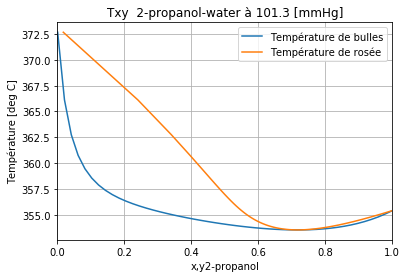

In [6]:
T=np.zeros(x_1.size)
for i in range(x_1.size):
    print(i)
    T[i]=brentq(lambda A: (x_1[i]*gamma_1_T(x_1[i],A)*PsatA(A)+x_2[i]*gamma_2_T(x_2[i],A)*PsatB(A))-P,100,900)
    


plt.plot(x_1,T,y_1(T),T)
plt.title('Txy  {:s}-{:s} à {:.1f} [mmHg]'.format(A,B,P))
plt.legend(['Température de bulles','Température de rosée'],loc='best')
plt.ylabel('Température [deg C]')
plt.xlabel('x,y{:s}'.format(A))
plt.xlim(0,1)
plt.grid();